In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

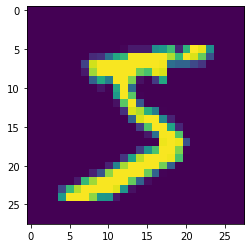

In [10]:
plt.imshow(x_train[0])

In [11]:
y_train[0]

5

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_example = to_categorical(y_train)

In [15]:
y_example[0] # 5 becomes 0,0,0,0,0,1,0,0,0,0

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [17]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [18]:
# scale the input to bring from 0-255 to -1 to 1

In [19]:
x_train = x_train/255

In [20]:
x_test = x_test/255

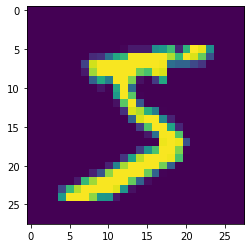

In [21]:
plt.imshow(x_train[0])

In [22]:
# reshape the data
x_train.shape

(60000, 28, 28)

In [23]:
# batch size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [24]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), \
                 input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten()) # 28*28=784
model.add(Dense(128, activation='relu'))

# output layer - 10 outputs i.e. 0-9
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',\
             metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [32]:
model.fit(x_train, y_cat_train, epochs=10,\
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1430 - accuracy: 0.9566 - val_loss: 0.0582 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0410 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0448 - val_accuracy: 0.9849


In [33]:
metrics = pd.DataFrame(model.history.history)

In [34]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.142980,0.956550,0.058199,0.9809
1,0.047345,0.985000,0.040960,0.9856
2,0.030757,0.990117,0.044770,0.9849


<AxesSubplot:>

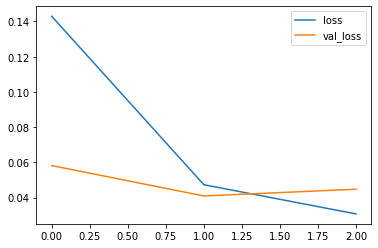

In [35]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

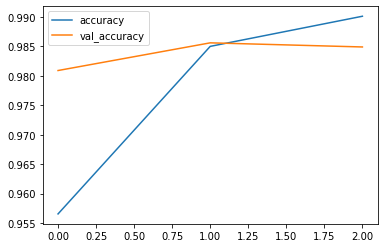

In [36]:
metrics[['accuracy', 'val_accuracy']].plot()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
predictions = model.predict_classes(x_test) # will deprecate

In [48]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

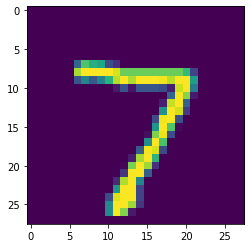

In [46]:
plt.imshow(x_test[0])

In [49]:
predictions[0]

7

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [51]:
confusion_matrix(y_test, predictions)

array([[ 977,    1,    0,    0,    0,    0,    1,    0,    1,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   2,    3, 1011,    4,    0,    0,    0,   11,    1,    0],
       [   0,    0,    2, 1002,    0,    4,    0,    1,    1,    0],
       [   0,    1,    1,    0,  974,    0,    1,    0,    0,    5],
       [   1,    0,    1,    4,    0,  885,    1,    0,    0,    0],
       [   5,    4,    0,    0,    3,    8,  936,    0,    2,    0],
       [   1,    1,    4,    1,    1,    1,    0, 1017,    1,    1],
       [   8,    1,    4,    4,    1,    3,    2,    7,  942,    2],
       [   5,    4,    0,    4,    9,    6,    0,    9,    1,  971]])

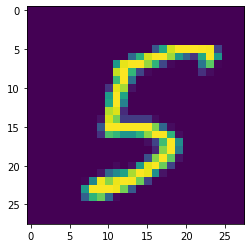

In [54]:
# prediction on unknown fiigure

my_number = x_test[23]

my_number.reshape(28,28)

plt.imshow(my_number)

In [55]:
item = my_number.reshape(1, 28, 28, 1)

In [57]:
model.predict_classes(item)

array([5])